# [DATASET과 DATALOADER](https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html)

- 데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있다.

- 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적이다.

- PyTorch는 `torch.utils.data.DataLoader`와 `torch.utils.data.Dataset`의 두 가지 데이터 기본 요소를 제공하며 미리 준비해된(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 한다.

- `Dataset`은 샘플과 정답(label)을 저장하고, `DataLoader`는 `Dataset`을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감싸준다.

- PyTorch의 도메인 특화 라이브러리들은 (FashionMNIST와 같은) 다양한 미리 준비해둔 데이터셋을 제공한다.

- 데이터셋은 `torch.utils.data.Dataset`의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있다.

- 이러한 데이터셋은 모델을 만들어보고(prototype) 성능을 측정(benchmark) 하는데 사용할 수 있다.

- [이미지 데이터](https://pytorch.org/vision/stable/datasets.html), [텍스트 데이터](https://pytorch.org/text/stable/datasets.html), [오디오 데이터](https://pytorch.org/audio/stable/datasets.html)

## 데이터셋 불러오기

- **TorchVision** 에서 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 데이터셋을 불러오는 예제를 살펴보자.

- Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있다.

- 각 예제는 흑백의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성되어있다.

다음 매개변수들을 사용하여 데이터셋을 불러온다.

- `root` 는 학습/테스트 데이터가 저장되는 경로입니다.

-  `train` 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.

- `download = True` 는 `root` 에 데이터가 없는 경우 인터넷에서 다운로드합니다.

- `transform` 과 `target_transform` 은 특징(feature)과 정답(label) 변형(transform)을 지정한다.

In [3]:
# 라이브러리 불러오기
import platform

import matplotlib.pyplot as plt
%matplotlib inline

if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
else:
    plt.rcParams["font.family"] = "AppleGothic"
    
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
# 학습용 데이터 불러오기
training_data = datasets.FashionMNIST(root = "data",
                                      train = True,
                                      download = True,
                                      transform = ToTensor())

# 테스트용 데이터 불러오기
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor())

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.6%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



- 위의 코드처럼 데이터를 불러온 후, 아래와 같은 메서드를 사용하면 특징(feature)과 정답(label)을 확인할 수 있다.

- `data` : 불러온 데이터의 특징을 확인할 수 있다.

- `targets` : 불러온 데이터의 정답을 확인할 수 있다.

In [34]:
print("Shape of trainging data tensor :", training_data.data.shape, "\n")
print("Unique lables of training data :", training_data.targets.unique(), "\n")

print("Shape of test data tensor :", test_data.data.shape, "\n")
print("Unique lables of test data :", test_data.targets.unique())

Shape of trainging data tensor : torch.Size([60000, 28, 28]) 

Unique lables of training data : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

Shape of test data tensor : torch.Size([10000, 28, 28]) 

Unique lables of test data : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## 데이터셋을 순회하고 시각화하기

- `Dataset` 에 리스트처럼 직접적으로 접근(index)할 수 있다.

- `training_data[index]`와 `matplotlib` 을 사용하여 학습 데이터의 일부를 시각화해보도록 하자.

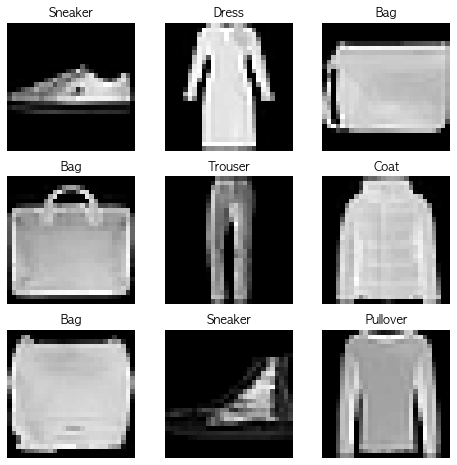

In [51]:
labels_map = {0 : "T-Shirt", 
              1 : "Trouser",
              2 : "Pullover",
              3 : "Dress",
              4 : "Coat",
              5 : "Sandal",
              6 : "Shirt",
              7 : "Sneaker",
              8 : "Bag",
              9 : "Ankle Boot"}

# 시각화 과정
figure = plt.figure(figsize = (8, 8))

cols, rows = 3, 3

for index in range(1, cols * rows+ 1):
    
    # 요소가 1개인 Tensor의 경우, 'item()'을 사용하여 숫자값으로 변환할 수 있다.
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    
    # index로 접근하는 경우 특징과 정답을 결과로 반환한다.
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, index)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

- 위의 코드에서 왜 `squeeze()` 메서드를 사용하는 것일까?

```python
plt.imshow(img.squeeze(), cmap = "gray")
```

- plt.imshow() 함수의 `x` 매개변수에 값을 넣어줄 때에는 `(M, N)`, `(M, N, 3)`, `(M, N, 4)` 형태의 배열이 입력되어야 한다.

- 그런데 PyTorch로 데이터를 불러오고 특정 관측치의 특징 변수들의 모양을 살펴보면 위와 같은 형태가 아님을 확인할 수 있다.

In [57]:
print("Shape of tensor :", training_data[0][0].shape)

Shape of tensor : torch.Size([1, 28, 28])


- 따라서 이미지를 시각화하기 위해서는 차원이 1인 부분을 제거해주어야 하는데, 제거할 때 사용하는 메서드가 `squeeze()` 메서드이다.

- PyTorch의 `squeeze()` 메서드의 원리는 `(A x B x 1 x C x 1)` 형태의 텐서에서 차원이 1인 부분을 제거하여 `(A x B x C)` 형태로 만들어준다.

- 또한, 원하는 dimension 위치를 따로 선택하면, **해당 위치의 1만 삭제가 가능**하다.

- 단, 해당 차원 위치의 size가 1이 아니라면, 삭제가 불가능하다.

In [58]:
print("Shape of squeeze tensor :", training_data[0][0].squeeze().shape)

Shape of squeeze tensor : torch.Size([28, 28])


---

## 파일에서 사용자 정의 데이터셋 만들기

- 사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 한다. `__init__`, `__len__`, `__getitem__`

- 아래 구현을 살펴보면 FashionMNIST 이미지들은 `img_dir` 디렉토리에 저장되고, 정답은 `annotations_file` csv 파일에 별도로 저장된다.

In [59]:
# 추가 라이브러리 불러오기
import os

import pandas as pd

from torchvision.io import read_image

In [60]:
class CustomImageDataset(Dataset):
    
    def __init__(self, annotation_file, imgdir, transform = None, target_transform = None):
        
        self.img_labels = pd.read_csv(annotations_file, names = ["file_name", "label"])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idex, 1]
        
        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            lagbel = self.target_transform(label)
            
        return image, label

### \_\_init\_\_

\_\_init\_\_ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행된다.

여기서는 이미지와 주석파일(annotation_file)이 포함된 디렉토리와 두가지 변형(transform)을 초기화한다.

labels.csv 파일은 다음과 같다.

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

### \_\_len\_\_

\_\_len\_\_ 함수는 데이터셋의 샘플 개수를 반환한다.

### \_\_getitem\_\_

\_\_getitem__ 함수는 주어진 인덱스 `idx` 에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.

인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, `read_image` 를 사용하여 이미지를 텐서로 변환하고, `self.img_labels`의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전형으로 변환합니다.

```python
def __getitem__(self, idx):
    
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    
    if self.transform:
        image = self.transform(image)
        
    if self.target_transform:
        label = self.target_transform(label)
        
    sample = {"image" : image, "label" : label}
    
    return sample
```

---

## DataLoader로 학습용 데이터 준비하기

- `Dataset` 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 한다.

- 모델을 학습할 때, 일반적으로 샘플들을 "미니배치(minibatch)"로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 `multiprocessing`을 사용하여 데이터 검색 속도를 높이려고 한다.

- `DataLoader` 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체이다.

In [61]:
# 추가 라이브러리 불러오기
from torch.utils.data import DataLoader

In [68]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

## DataLoader를 통해 순회하기(iterate)

- `DataLoader`에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회할 수 있다.

- 아래의 각 순회는 `train_features` 와 `train_labels`의 묶음을 반환한다.

- `shuffle = True` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞인다.

Feature batch shape : torch.Size([64, 1, 28, 28]) 

Labels batch shape : torch.Size([64]) 



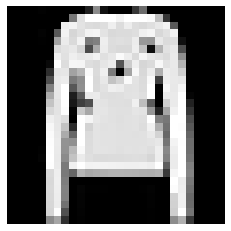

In [70]:
# 이미지와 정답(label)을 표시한다.
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape : {train_features.size()} \n")
print(f"Labels batch shape : {train_labels.size()} \n")

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()